<a href="https://colab.research.google.com/github/flavio641/Modelos_Aprendizados_Maquinas/blob/main/Aprova%C3%A7%C3%A3o_de_Cr%C3%A9dito_Imobil%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/content/imobiliario.csv')
data

,idade,empregador,renda,education,education_num,estado_civil,ocupacao,relacionamento,race,sex,investimentos,endividamento,horas_por_semana,nacionalidade,aprovacao_credito
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,não aprovado
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,não aprovado
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,não aprovado
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,não aprovado
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,não aprovado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,não aprovado
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,APROVADO
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,não aprovado
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,não aprovado


In [3]:
# informções do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idade              32561 non-null  int64 
 1   empregador         32561 non-null  object
 2   renda              32561 non-null  int64 
 3   education          32561 non-null  object
 4   education_num      32561 non-null  int64 
 5   estado_civil       32561 non-null  object
 6   ocupacao           32561 non-null  object
 7   relacionamento     32561 non-null  object
 8   race               32561 non-null  object
 9   sex                32561 non-null  object
 10  investimentos      32561 non-null  int64 
 11  endividamento      32561 non-null  int64 
 12  horas_por_semana   32561 non-null  int64 
 13  nacionalidade      32561 non-null  object
 14  aprovacao_credito  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# estastíscas descritivas da variaveis numéricas 
data.describe()

,idade,renda,education_num,investimentos,endividamento,horas_por_semana
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Tabela de frequência da variável
data.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [6]:
# Tabel de frequência do target
data.aprovacao_credito.value_counts()

não aprovado    24720
APROVADO         7841
Name: aprovacao_credito, dtype: int64

In [9]:
data.nacionalidade.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [10]:
data.isnull().sum()

idade                0
empregador           0
renda                0
education            0
education_num        0
estado_civil         0
ocupacao             0
relacionamento       0
race                 0
sex                  0
investimentos        0
endividamento        0
horas_por_semana     0
nacionalidade        0
aprovacao_credito    0
dtype: int64

In [11]:
data.duplicated().sum()

24

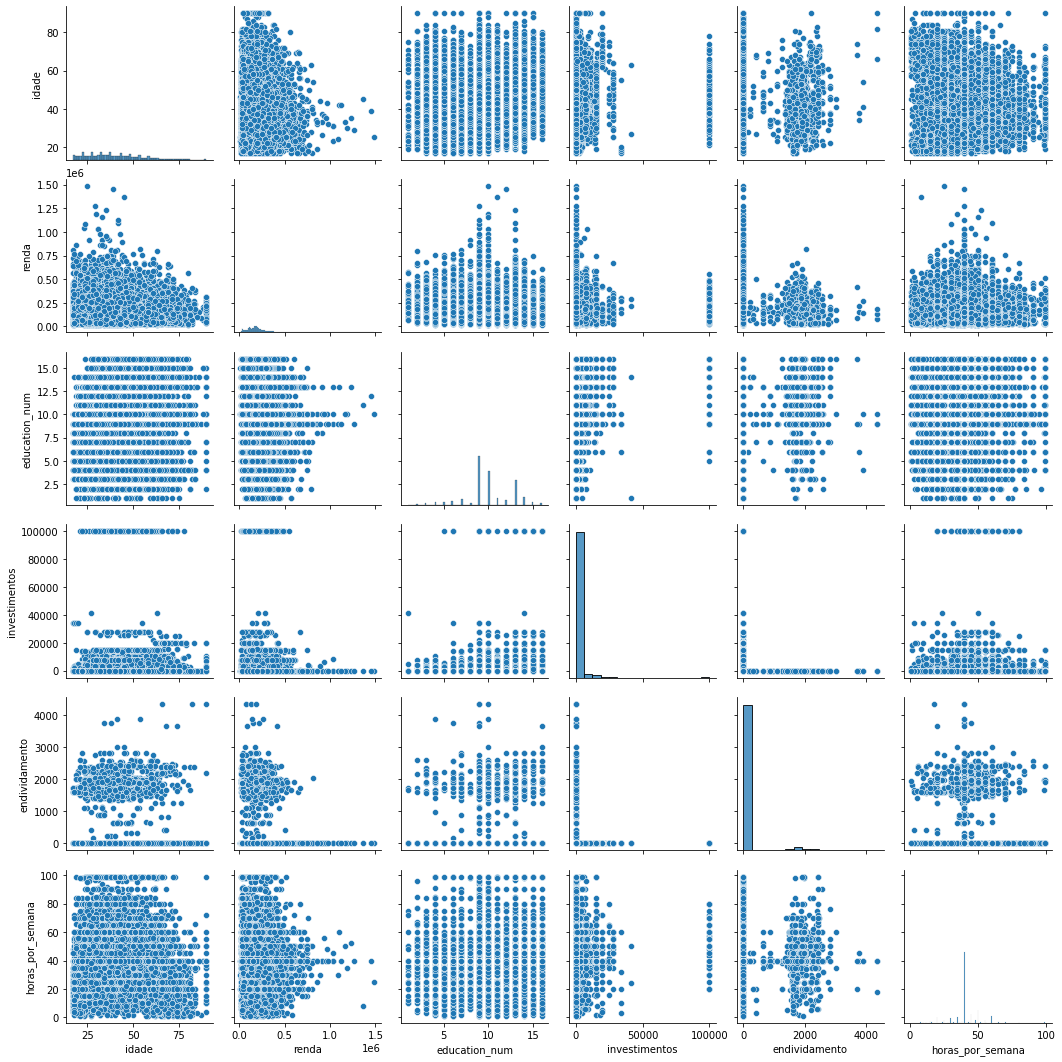

In [12]:
# Explorando a visualização dos dados usando matplotlib
sns.pairplot(data)

# ***Pré Processamento dos Dados ***

In [14]:
# Eliminar os Registos duplicados 
data.drop_duplicates(keep= 'first', inplace= True)
data
data.duplicated().sum()

0

In [15]:
# Convertendo campos strings em numéricas
for label in ['race', 'ocupacao','education', 'empregador','estado_civil', 'relacionamento','sex', 'nacionalidade']:
  data[label] = LabelEncoder().fit_transform(data[label])

In [16]:
# Separando as variaveis de entrado em X
X = data[['race','horas_por_semana','ocupacao', 'education', 'empregador', 'estado_civil','relacionamento','sex', 'nacionalidade']]

In [18]:
# Calcular as correlaçõe das variaveis 
corelacoes = X.corr()
corelacoes

,race,horas_por_semana,ocupacao,education,empregador,estado_civil,relacionamento,sex,nacionalidade
race,1.000000,0.041920,0.006794,0.014303,0.049740,-0.067930,-0.116051,0.087472,0.137850
horas_por_semana,0.041920,1.000000,0.080501,0.055991,0.139047,-0.190432,-0.248875,0.229187,-0.002502
ocupacao,0.006794,0.080501,1.000000,-0.021235,0.254993,-0.009814,-0.075587,0.080501,-0.012406
education,0.014303,0.055991,-0.021235,1.000000,0.023456,-0.038422,-0.011057,-0.027433,0.063870
empregador,0.049740,0.139047,0.254993,0.023456,1.000000,-0.064761,-0.090433,0.095999,-0.007677
estado_civil,-0.067930,-0.190432,-0.009814,-0.038422,-0.064761,1.000000,0.185532,-0.129402,-0.023406
relacionamento,-0.116051,-0.248875,-0.075587,-0.011057,-0.090433,0.185532,1.000000,-0.582594,-0.005636
sex,0.087472,0.229187,0.080501,-0.027433,0.095999,-0.129402,-0.582594,1.000000,-0.008256
nacionalidade,0.137850,-0.002502,-0.012406,0.063870,-0.007677,-0.023406,-0.005636,-0.008256,1.000000


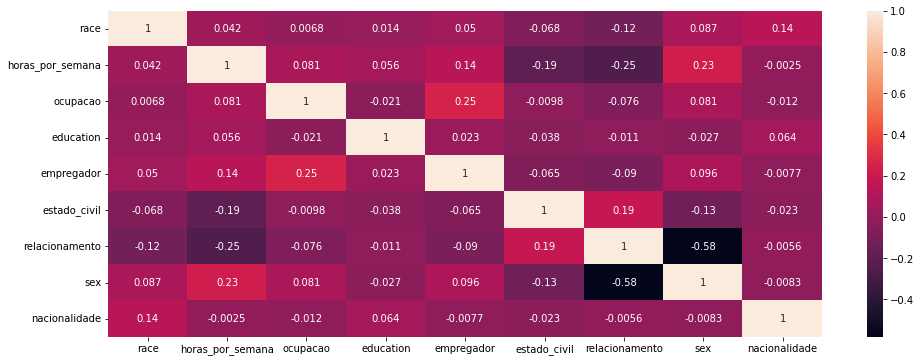

In [19]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16,6))
sns.heatmap(data= corelacoes, annot= True)


In [20]:
# Separando a variável Target
y = data['aprovacao_credito'].values.tolist()

In [21]:
# Separando as variáveis em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X,y, test_size= 0.30, random_state= 42)

# ***Maquina Preditiva Segmentação de Clientes***

In [22]:
# Criando a maquina preditiva
clf = RandomForestClassifier(n_estimators= 1000)
clf = clf.fit(x_treino, y_treino)

# ***Avaliação da Maquina Preditiva***

In [23]:
# Avaliando a acuracia da maquina preditiva
acuracy = clf.score(x_teste, y_teste)
print('Acuracia {}'.format(acuracy))

Acuracia 0.8205285802089736


In [27]:
# Avaliando a confusion matrix e Classification Report
prediction = clf.predict(x_teste)
cm = confusion_matrix(prediction, y_teste)
print(cm)
cr = classification_report(prediction, y_teste)
print(cr)

[[1320  715]
 [1037 6690]]
              precision    recall  f1-score   support

    APROVADO       0.56      0.65      0.60      2035
não aprovado       0.90      0.87      0.88      7727

    accuracy                           0.82      9762
   macro avg       0.73      0.76      0.74      9762
weighted avg       0.83      0.82      0.83      9762



In [28]:
cfg = XGBClassifier(n_estimators= 1000, learning_rate= 0.01)


In [32]:
cfg = cfg.fit(x_treino, y_treino)

In [33]:
acuracy = cfg.score(x_teste, y_teste)
print('Acuracia {}'.format(acuracy))

Acuracia 0.8204261421839787


In [34]:
prediction = cfg.predict(x_teste)
cm = confusion_matrix(prediction, y_teste)
print(cm)
cr = classification_report(prediction, y_teste)
print(cr)

[[1320  716]
 [1037 6689]]
              precision    recall  f1-score   support

    APROVADO       0.56      0.65      0.60      2036
não aprovado       0.90      0.87      0.88      7726

    accuracy                           0.82      9762
   macro avg       0.73      0.76      0.74      9762
weighted avg       0.83      0.82      0.83      9762

